# Временные ряды - Стационарность

In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
data2 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
data3 = pd.read_csv('international-airline-passengers.csv')

In [3]:
data1.head()# берем наш времянной столбец Month

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
data3.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [5]:
all_series = {
    "Monthly sales of company X": data1["Count"],
    "Monthly Boston armed robberies": data2["Count"],
    "International airline passengers: monthly totals in thousands": data3["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"]
}

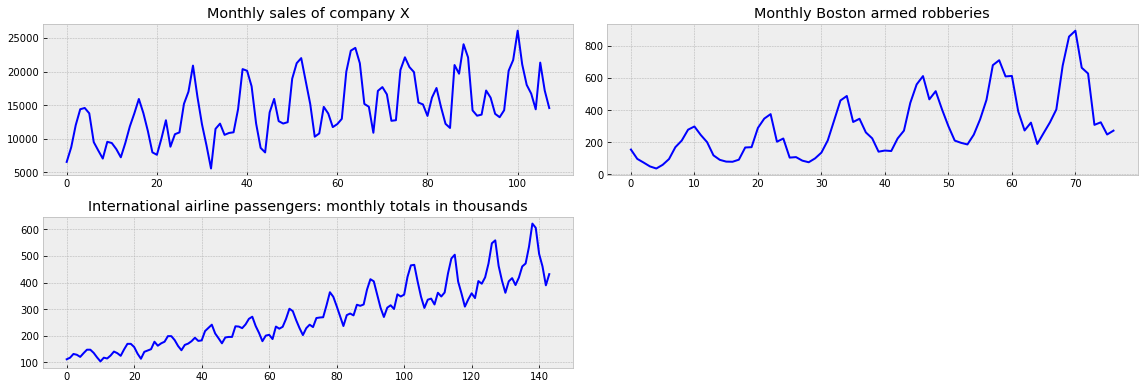

In [6]:
import matplotlib.pyplot as plt
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

- график№1 "Monthly sales of company X" - имеет сезонность
- график №2 "Monthly Boston armed robberies" - также сезонен
- график №3 "International airline passengers: monthly totals in thousands" - имеет ярко выраженный тренд

соответственно все эти ряды не являются стационарными

In [20]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

for key in all_series.keys():    
    row =  [u'JB', u'p-value', u'skew', u'kurtosis']
    jb_test = sm.stats.stattools.jarque_bera(all_series[key])
    a = np.vstack([jb_test])
    itog = SimpleTable(a, row)
    print(itog)

        JB               p-value               skew             kurtosis    
----------------------------------------------------------------------------
3.4945201159396397 0.17425072686303192 0.31500339419302226 2.383841357804773
----------------------------------------------------------------------------
        JB                p-value               skew             kurtosis     
------------------------------------------------------------------------------
14.164796378099561 0.0008397568359472747 1.0212393036962546 3.4932368668728246
------------------------------------------------------------------------------
 JB p-value skew kurtosis
-------------------------
nan     nan  nan      nan
-------------------------


Значение данной статистики свидетельствует о том, нулевая гипотеза о нормальности распределения отвергается с малой вероятностью (probably > 0.05), и, следовательно, наш ряд имеет нормальное распределения.

In [21]:
for key in all_series.keys():
    test = sm.tsa.adfuller(all_series[key])
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')

adf:  -1.2238127661752831
p-value:  0.6632691049832871
Critical values:  {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
есть единичные корни, ряд не стационарен
adf:  0.6547150829524471
p-value:  0.9888894205170052
Critical values:  {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
есть единичные корни, ряд не стационарен
adf:  nan
p-value:  nan
Critical values:  {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}
единичных корней нет, ряд стационарен


In [23]:
# в последнем случае проведем тест Дики-Фулера
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller( data3["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for [key, value] in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


увидили, что ошибки нет

In [29]:
diff1 = data1['Count'].diff(periods=1).dropna()
diff2 = data2['Count'].diff(periods=1).dropna()
diff3 = data3['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].diff(periods=1).dropna()
# функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода. Период смещения передается как параметр period. 
#Т.к. в разности первое значение получиться неопределенным, то нам надо избавиться от него для этого и используется метод dropna().

In [31]:
test1 = sm.tsa.adfuller(diff1)
test2 = sm.tsa.adfuller(diff2)
test3 = sm.tsa.adfuller(diff3)
print('adf: ', test1[0])
print('p-value: ', test1[1])
print('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')
print('adf: ', test2[0])
print('p-value: ', test2[1])
print('Critical values: ', test2[4])
if test2[0]> test2[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')
print('adf: ', test3[0])
print('p-value: ', test3[1])
print('Critical values: ', test3[4])
if test3[0]> test3[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -6.1997992308006955
p-value:  5.8447525992768446e-08
Critical values:  {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
единичных корней нет, ряд стационарен
adf:  -2.5879697670629445
p-value:  0.09550925078558953
Critical values:  {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
есть единичные корни, ряд не стационарен
adf:  -2.8292668241700056
p-value:  0.054213290283824704
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
есть единичные корни, ряд не стационарен


как видим выше один из наших рядов стал стационарен, а другие 2 стали намного ближе к стационарности

In [34]:
m1 = diff1.index[len(diff1.index)//2+1]
r1 = sm.stats.DescrStatsW(diff1[m1:])
r2 = sm.stats.DescrStatsW(diff1[:m1])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

m2 = diff2.index[len(diff2.index)//2+1]
r_1 = sm.stats.DescrStatsW(diff2[m2:])
r_2 = sm.stats.DescrStatsW(diff2[:m2])
print('p-value: ', sm.stats.CompareMeans(r_1,r_2).ttest_ind()[1])

m3 = diff3.index[len(diff3.index)//2+1]
r__1 = sm.stats.DescrStatsW(diff3[m3:])
r__2 = sm.stats.DescrStatsW(diff3[:m3])
print('p-value: ', sm.stats.CompareMeans(r__1,r__2).ttest_ind()[1])

p-value:  0.9829654540772548
p-value:  0.8767582288993334
p-value:  0.8345860449203855


Высокое p-value дает нам возможность утверждать, что нулевая гипотеза о равенстве средних верна, что свидетельствует о стационарности ряда. Осталось убедиться в отсутствии тренда и сезонности для этого построим график нашего нового ряда:

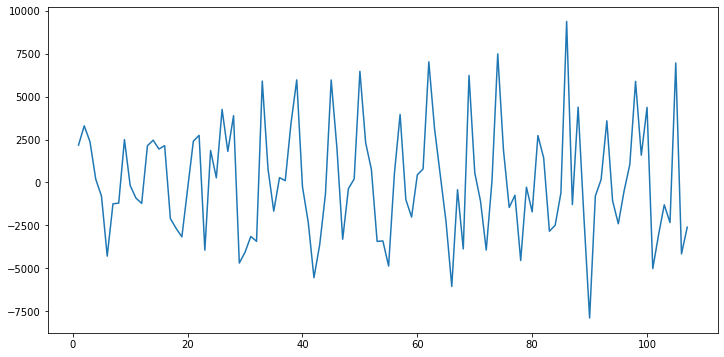

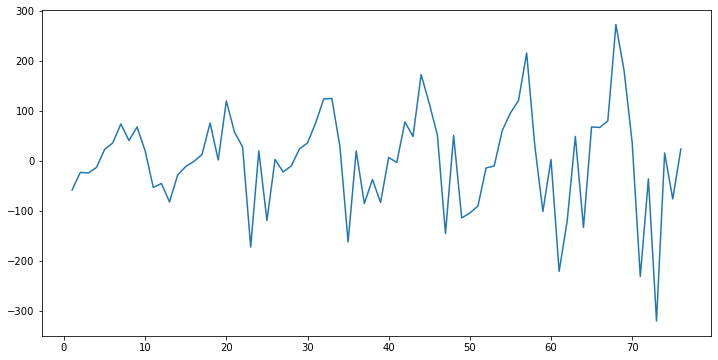

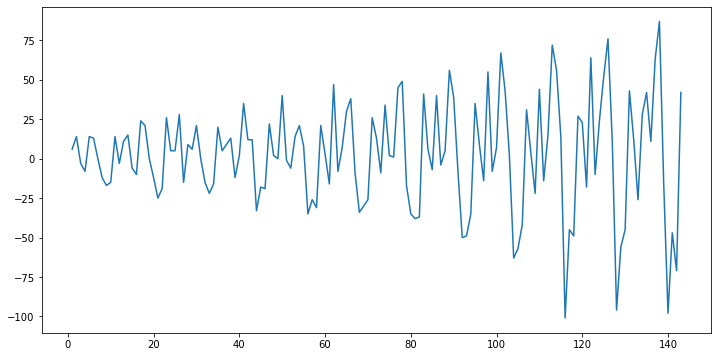

In [42]:
diff1.plot(figsize=(12,6))
plt.show()
diff2.plot(figsize=(12,6))
plt.show()
diff3.plot(figsize=(12,6))
plt.show()

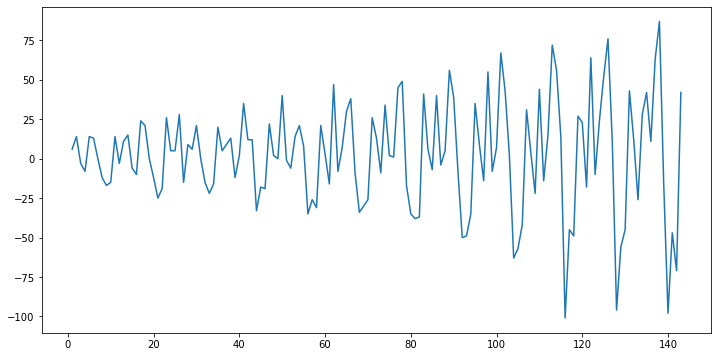

In [38]:
diff3.plot(figsize=(12,6))